## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
# importing python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

In [ ]:
# linking drive for dataset 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing dataset
path = '/content/drive/MyDrive/EDA/Hotel Bookings.csv'
df = pd.read_csv(path)


In [ ]:
# top 3 rows of the dataset
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,119380,119381,119382,119383,119384,119385,119386,119387,119388,119389
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,...,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel
is_canceled,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
lead_time,342,737,7,13,14,14,0,9,85,75,...,44,188,135,164,21,23,102,34,109,205
arrival_date_year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
arrival_date_month,July,July,July,July,July,July,July,July,July,July,...,August,August,August,August,August,August,August,August,August,August
arrival_date_week_number,27,27,27,27,27,27,27,27,27,27,...,35,35,35,35,35,35,35,35,35,35
arrival_date_day_of_month,1,1,1,1,1,1,1,1,1,1,...,31,31,30,31,30,30,31,31,31,29
stays_in_weekend_nights,0,0,0,0,0,0,0,0,0,0,...,1,2,2,2,2,2,2,2,2,2
stays_in_week_nights,0,0,1,1,2,2,2,2,3,3,...,3,3,4,4,5,5,5,5,5,7
adults,2,2,1,1,2,2,2,2,2,2,...,2,2,3,2,2,2,3,2,2,2


In [ ]:
# columns and row count 
df.shape

(119390, 32)

In [ ]:
# columns names 
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# statistics information of numerical columns from the DataFrame
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# total number of missing value in the dataframe
missing_value = sum(pd.to_numeric(df.isnull().sum()))
print(missing_value)


129425


# **<font color=Blue> Cleaning the Dataframe </font>**

In [ ]:
# null values for each column
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# columns that containg null values 
df[df.columns[df.isnull().any()]].isnull().sum()

children         4
country        488
agent        16340
company     112593
dtype: int64

In [ ]:
miss_columns = df.isna().any()[lambda x: x].index.tolist()
miss_columns = df[miss_columns]
miss_columns.head(2)


,children,country,agent,company
0,0.0,PRT,NaN,NaN
1,0.0,PRT,NaN,NaN


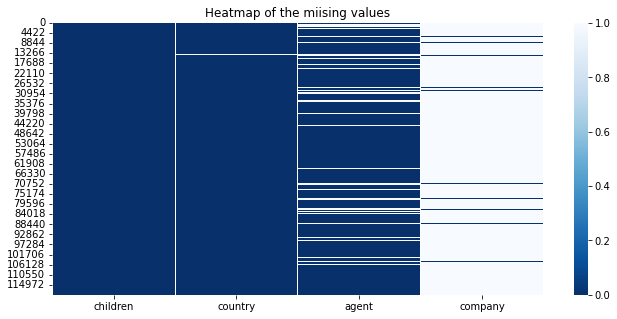

In [ ]:
#Heatmap of columns which have most of the miising values
plt.figure(figsize = (11,5))
sns.heatmap(miss_columns.isnull(), cbar=True,cmap="Blues_r")
plt.title("Heatmap of the miising values")
plt.show()

In [ ]:
# dropping the columns which have most of the null values 
df=df.drop(['agent','company'],axis=1)

In [ ]:
# filling 0 in null values 
df = df.fillna(0)
# replacing 0 in country columns ( categorical column)
df.country = df.country.replace(0, "undefined")

In [ ]:
# checking columns that containg null values 
df[df.columns[df.isnull().any()]].isnull().sum()

Series([], dtype: float64)

# <font color =Red > As we can see we dont have any null values in our Dataframe 


# <font color= Green > EXPLORATORY DATA ANALYSIS

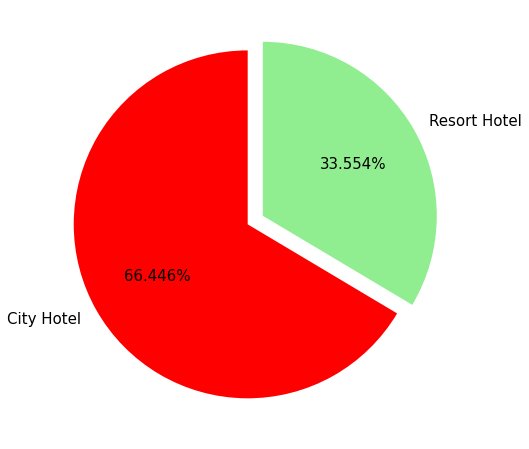

In [ ]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8
# Indexing labels. tolist() #will convert the index to list for easy manipulation
labels = df['hotel'].value_counts().index.tolist()
# Converting value counts to list
sizes = df['hotel'].value_counts().tolist()
explode = (0, 0.1)
colors = ['red', 'lightgreen']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.3f%%',startangle=90, textprops={'fontsize': 15})
plt.show()

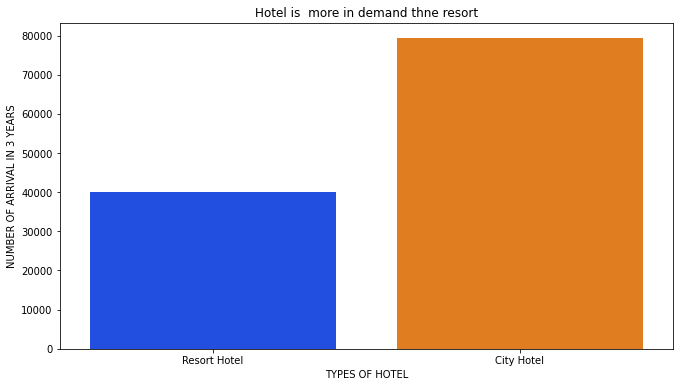

In [ ]:
# HOTEL WAS MORE ENGAGING AND IN DEMAND IN 3 YEARS
plt.figure(figsize=(11,6))
sns.countplot('hotel', data= df, palette="bright")
plt.xlabel("TYPES OF HOTEL")
plt.ylabel("NUMBER OF ARRIVAL IN 3 YEARS")
plt.title("Hotel is  more in demand thne resort")
plt.show()

##<font color =green> -- As we can see from above pie chart more then 66% people stick with city hotel as it is cheaper then resort hotel.</font> 

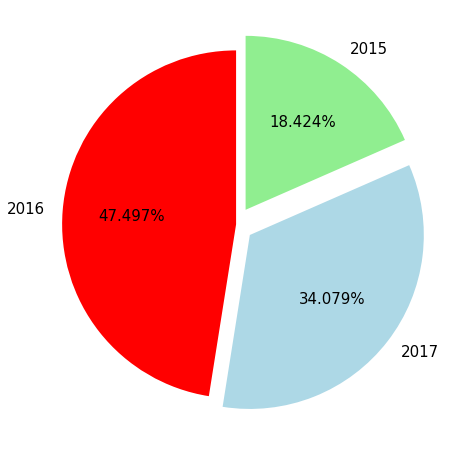

In [ ]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8
# Indexing labels. tolist() #will convert the index to list for easy manipulation
labels = df['arrival_date_year'].value_counts().index.tolist()
# Converting value counts to list
sizes = df['arrival_date_year'].value_counts().tolist()
explode = (0, 0.1,0.1)
colors = ['red','lightblue', 'lightgreen']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.3f%%',startangle=90, textprops={'fontsize': 15})
plt.show()

## <font color =Grenn> As we an see 2016 is the most profitable year

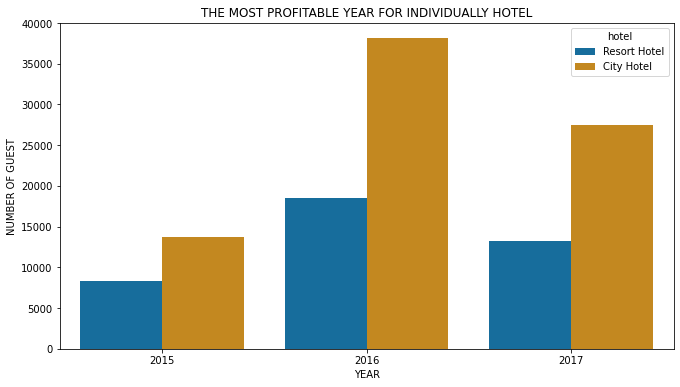

In [ ]:
# Profitable year for city and resort hotels
plt.figure(figsize=(11,6))
sns.countplot('arrival_date_year', hue = 'hotel', data= df, palette="colorblind")
plt.xlabel("YEAR")
plt.ylabel("NUMBER OF GUEST")
plt.title("THE MOST PROFITABLE YEAR FOR INDIVIDUALLY HOTEL")
plt.show()


<font color=red>**--> ALL 3 YEARS CITY HOTEL HAVE MADE MORE PROFIT THAN RESORT HOTEL**

<font color=red>**--> 2016 IS THE MOST PROFITABLE FOR BOTH OF THE HOTEL**

<font color=red>**--> ALL 3 YEARS CITY HOTEL HAVE MORE NUMBER OF GUEST THAN RESORT HOTEL**
</font>

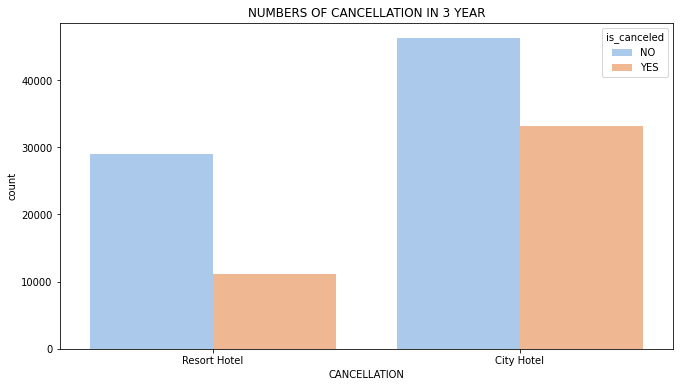

In [ ]:
# cancellattion of booking in 3 years
df2 = df.copy() # creating copy of df
df2["is_canceled"] = df2.is_canceled.replace([0,1],["NO","YES"])
plt.figure(figsize=(11,6))
sns.countplot("hotel", hue= "is_canceled" , data = df2, palette="pastel")
plt.xlabel("CANCELLATION")
plt.title("NUMBERS OF CANCELLATION IN 3 YEAR")
plt.show()

**<font color = red>--> NUMBER OF BOOKING CANCELLATION IS MORE THAN 50% OF TOTAL BOOKING**

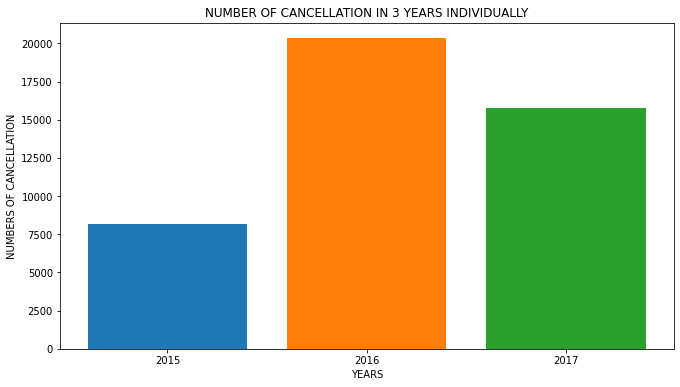

In [ ]:
# CANCELLATION OF BOOKING IN 3 YEARS INDIVIDUALLY
x = ["2015", "2016", "2017"]
y = []
for i in x:
  y.append(df[df["arrival_date_year"] == int(i)][df[df["arrival_date_year"] == int(i)]["is_canceled"] == 1]["is_canceled"].count())
plt.figure(figsize=(11,6))
plt.bar(x,y, color = sns.color_palette())
plt.xlabel("YEARS")
plt.ylabel("NUMBERS OF CANCELLATION")
plt.title("NUMBER OF CANCELLATION IN 3 YEARS INDIVIDUALLY")
plt.show()

<font color = green >**-->2016 HAS THE HIGHEST NUMBERS OF CANCELLATION IN 3 YEARS**

#<font color= REd> Which significant distribution channel has highest cancellation percentage? </font>

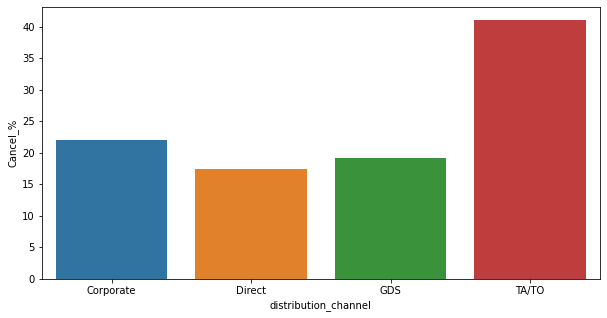

In [ ]:
group_by_dc = df.groupby('distribution_channel')
d1 = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,5))
sns.barplot(x = d1.index, y = d1['Cancel_%'])
plt.show()

###<font color = Green >TA/TO has highest booking cancellation %. Therefore, a booking via TA/TO is 30% likely to get cancelled.
###<font color = Green >Let us see what causes the cancelation of bookings of rooms by customers.
###<font color = Green >One question can arise that may be longer waiting period or longer lead time causes the cancellation of bookings, let us check that. </font>

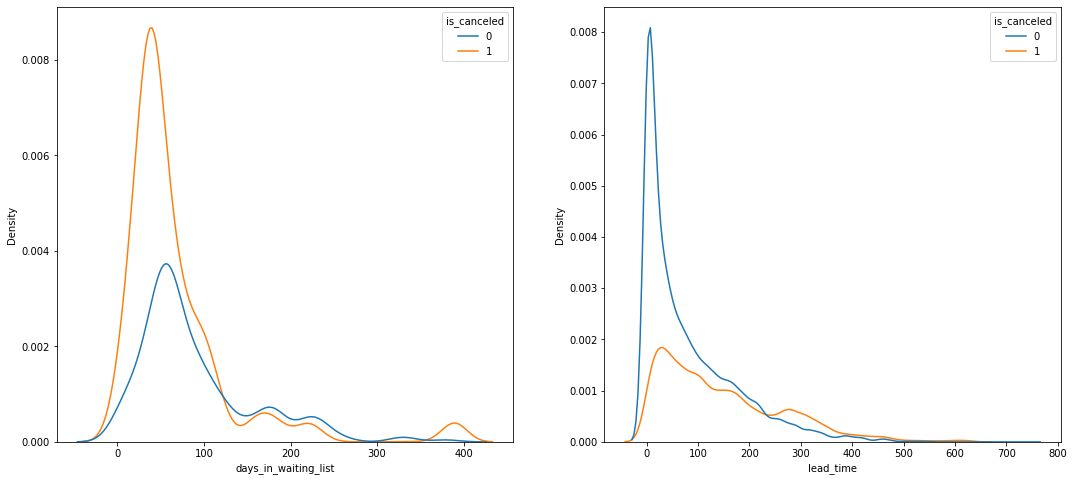

In [ ]:
waiting_bookings = df[df['days_in_waiting_list'] !=0]  # Selecting bookings with non zero waiting time
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings)
sns.kdeplot(ax = axes[1], x = df['lead_time'], hue = df['is_canceled'])
plt.show()

###<font color = Green >We see that most of the bookings that are cancelled have waiting period of less 150 days but also most of bookings that are not cancelled also have waiting period less than 150 days. Hence this shows that waiting period has no effect on cancellation of bookings.
###<font color = Green > Also, lead time has no affect on cancellation of bookings, as both curves of cancelation and not cncelation are similar for lead time too.

###<font color = Blue > Now we will check whether not getting allotted the same room type as demanded is the cause of cancellation fo bookings

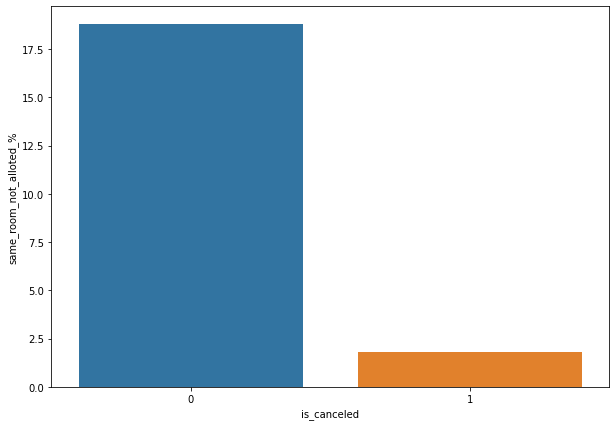

In [ ]:
def check_room_allot(x):
  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0
df['same_room_not_alloted'] = df.apply(lambda x : check_room_allot(x), axis = 1)
grp_by_canc = df.groupby('is_canceled')
D3 = pd.DataFrame((grp_by_canc['same_room_not_alloted'].sum()/grp_by_canc.size())*100).rename(columns = {0: 'same_room_not_alloted_%'})
plt.figure(figsize = (10,7))
sns.barplot(x = D3.index, y = D3['same_room_not_alloted_%'])
plt.show()

###<font color = Green > We see that not getting same room as demanded is not the case of cancellation of rooms. A significant percentage of bookings are not cancelled even after getting different room as demanded.

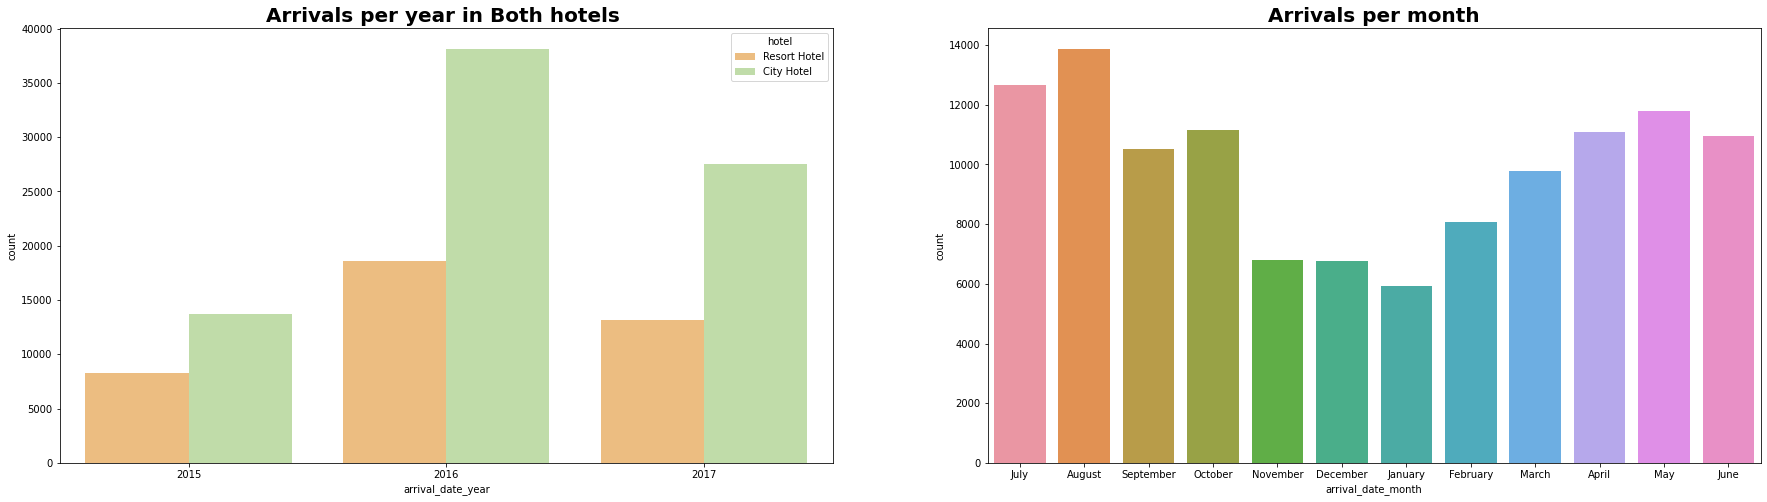

In [ ]:
#arrivals of customer
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='arrival_date_year',hue='hotel', data=df,palette='Spectral')
plt.title("Arrivals per year in Both hotels ",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'arrival_date_month')
plt.title('Arrivals per month',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()

* ### <font color=Blue>We can see most of the bookings were in the year 2016 and bookings were doine in City hotel</font>
* ### <font color=Blue>Most bookings were done in the month of May,June, July, August</font>

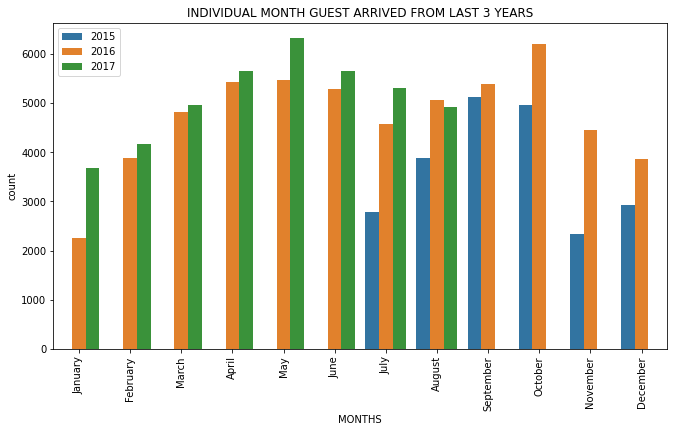

In [ ]:
plt.figure(figsize= (11,6))

x = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
sns.countplot("arrival_date_month", hue="arrival_date_year", data=df, order= x)
plt.xticks(rotation = "vertical")
plt.xlabel("MONTHS")
plt.title("INDIVIDUAL MONTH GUEST ARRIVED FROM LAST 3 YEARS")
plt.legend(loc="upper left")
plt.show()

<font color = blue >
 ONLY JULY AND AUGUST ARE IN ALL 3 YEARS THATS WHY MORE GUEST IS IN AND JULY

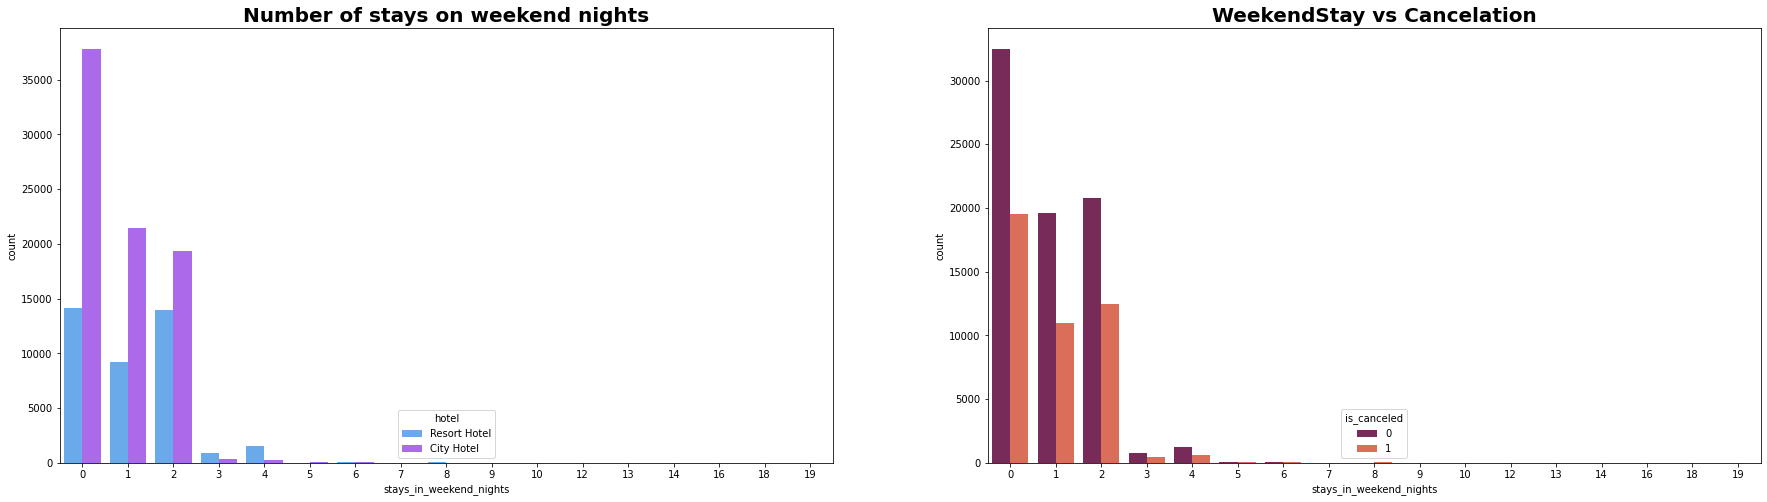

In [ ]:

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='stays_in_weekend_nights',hue='hotel', data=df, palette='cool')
plt.title("Number of stays on weekend nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'stays_in_weekend_nights', hue='is_canceled', palette='rocket')
plt.title('WeekendStay vs Cancelation',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()

* ### <font color=green>In the first graph we can see that most of the weekend nights were booked in City Hotel</font>
* ### <font color=green>Second plot shows most of weekend nights which were booked were not canceled</font>

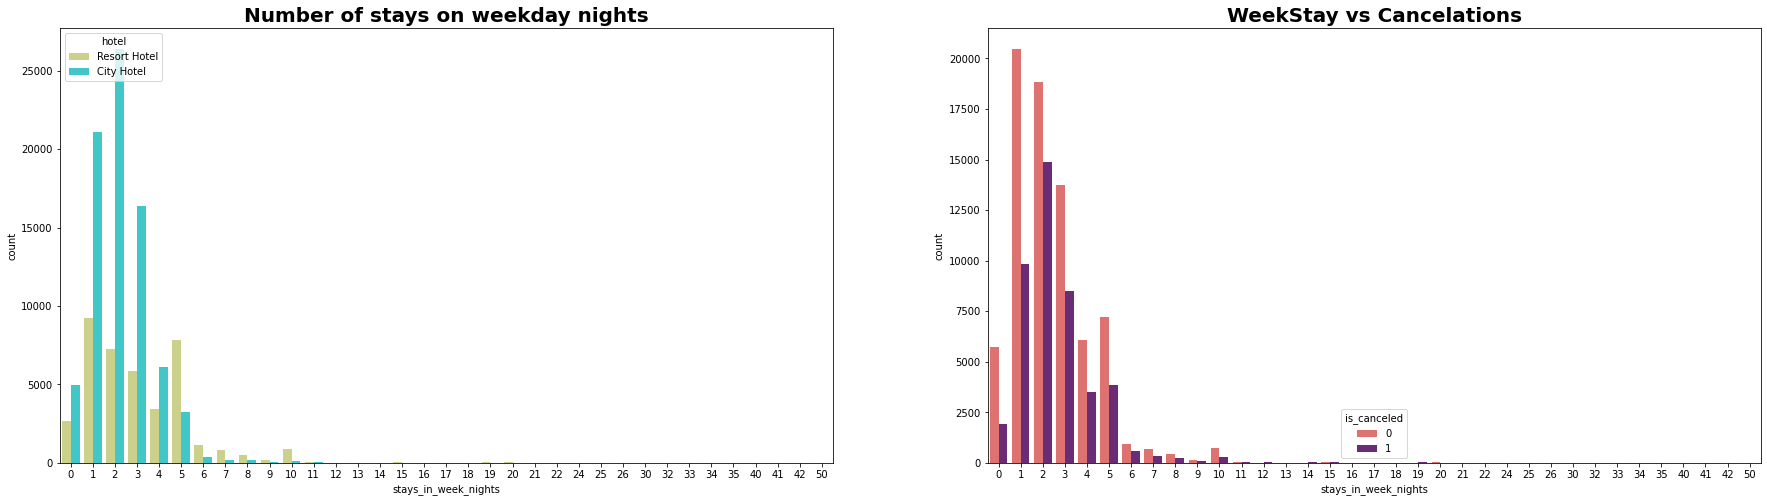

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='stays_in_week_nights',hue='hotel', data=df, palette='rainbow_r')
plt.title("Number of stays on weekday nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'stays_in_week_nights', hue='is_canceled', palette='magma_r')
plt.title('WeekStay vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)
plt.show()


* ### <font color=green>Weekday night stays were more in City Hotel</font>
* ### <font color=green>Less cancelations were observed</font>

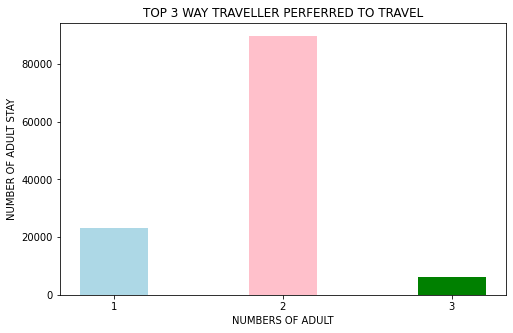

In [ ]:
# TOP 3 TRAVELLER PREFERED TO TRAVEL (SOLO, COUPLE OR IN GROUP OD 3)


x = df['adults'].unique()[:3]
y = df['adults'].value_counts()[:3]

plt.figure(figsize=(8,5))
plt.bar(x, y, color =['pink', 'lightblue','green'], width = 0.4)
plt.xlabel("NUMBERS OF ADULT")
plt.ylabel("NUMBER OF ADULT STAY")
plt.title("TOP 3 WAY TRAVELLER PERFERRED TO TRAVEL")
plt.xticks(np.arange(1, 4))
plt.show()

**<font color = blue > --> COUPLE GUEST HAS MORE CHECK-INS THAN ANY OTHER NUMBER OF GUESTS**

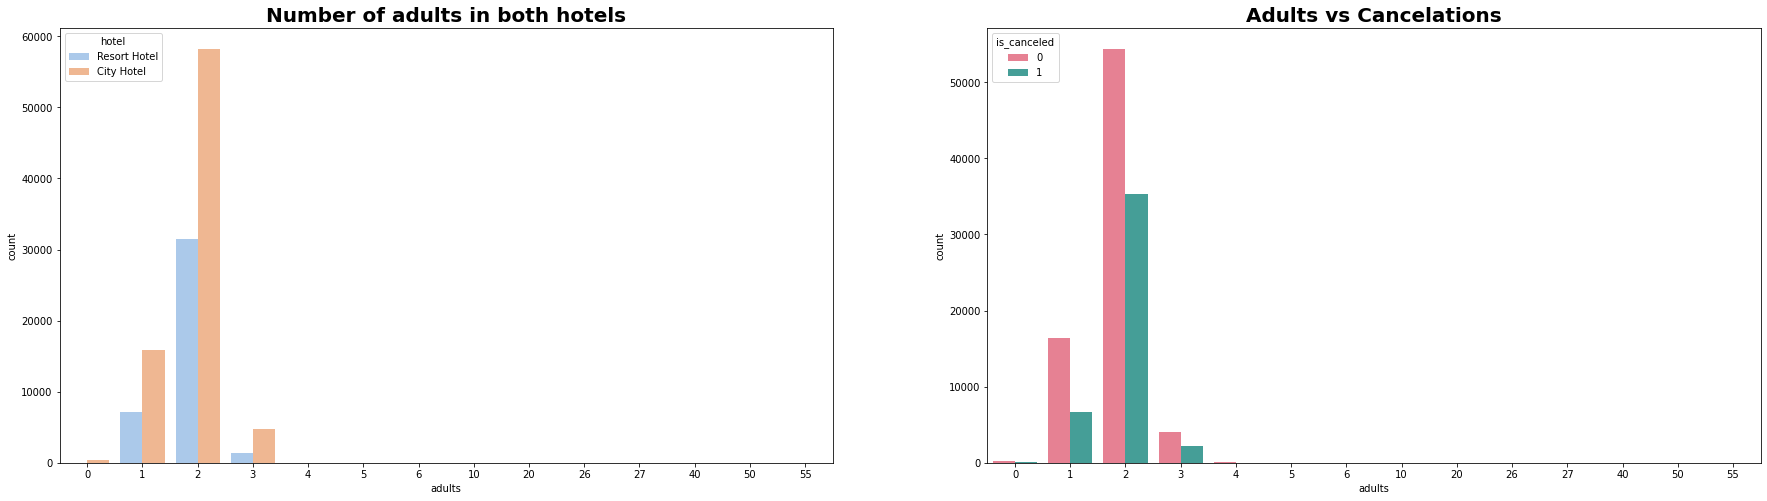

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='adults',hue='hotel', data=df, palette='pastel')
plt.title("Number of adults in both hotels",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'adults', hue='is_canceled', palette='husl')
plt.title('Adults vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

## <font color = red > Adults who were 2 in number are more and preferred city hotel rather than resort hotel, infact more than half the visitors even canceled the bookings



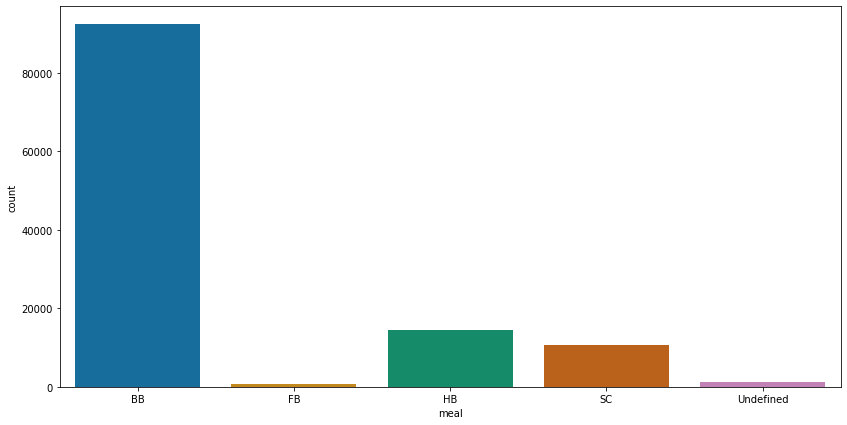

In [ ]:
# Undefined/SC – no meal package
# BB – Bed & Breakfast
# HB – Half board (breakfast and one other meal – usually dinner)
# FB – Full board (breakfast, lunch and dinner)
plt.figure(figsize=(14,7))
sns.countplot(x=df['meal'], palette='colorblind')
plt.show()

**<font color = blue >--> MORE THAN 70% OF HOTELS PROVIDE BED AND BREAKFAST**


In [ ]:
# TABLE OF WHAT HOTEL PROVIDE WHAT TYPE OF MEAL!
df.groupby("meal")["hotel"].agg(value = ("value_counts"))

value
meal      hotel              
BB        City Hotel    62305
          Resort Hotel  30005
FB        Resort Hotel    754
          City Hotel       44
HB        Resort Hotel   8046
          City Hotel     6417
SC        City Hotel    10564
          Resort Hotel     86
Undefined Resort Hotel   1169

**<font color =green>--> HOTELS WITH THE TYPE OF MEAL THEY PROVIDE***

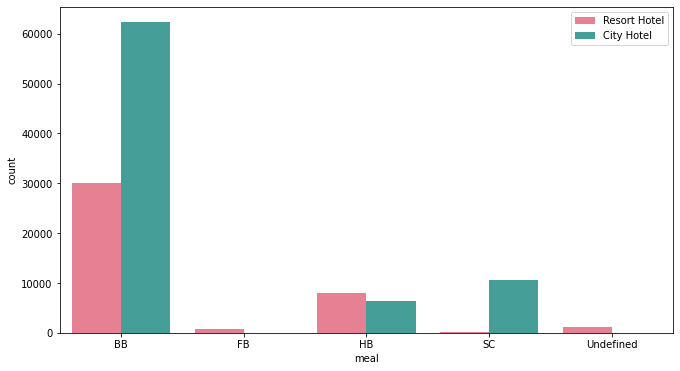

In [ ]:
# hotel service 
plt.figure(figsize=(11,6))
sns.countplot(x = "meal", hue = "hotel",palette='husl', data = df);
plt.legend(loc='upper right')
plt.show()

**<font color = red> --> BOTH TYPE OF HOTEL, CITY HOTEL OR RESORT HOTEL PROVIDE BED AND BREAKFAST SERVICE**

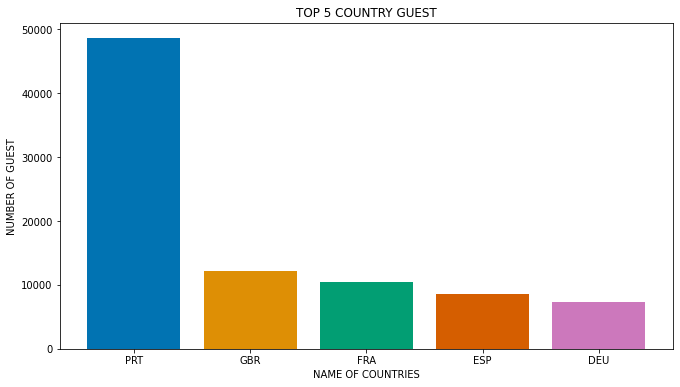

In [ ]:
# WHAT ARE THE TOP 5 COUNTRIES MAX NUMBER OF GUEST IS COMING?
# PRT :- Portugal
# GBR :- United Kingdom
# FRA :- France
# ESP :- Spain
# DEU :- Germany
x = list(df['country'].value_counts().index.tolist()[0:5])
y = list(df['country'].value_counts()[:5])
plt.figure(figsize=(11,6))
plt.bar(x,y, color = sns.color_palette("colorblind"))
plt.xlabel("NAME OF COUNTRIES")
plt.ylabel("NUMBER OF GUEST")
plt.title("TOP 5 COUNTRY GUEST")
sns.color_palette("hls")
plt.show()

**<font color=green>--> FROM COUNTRY PRT MORE NUMBER OF GUEST VISITED IN LAST 3 YEARS**

**<font color=green>--> 40% GUESTS ARE FROM PRT**

## MARKET SEGMENT

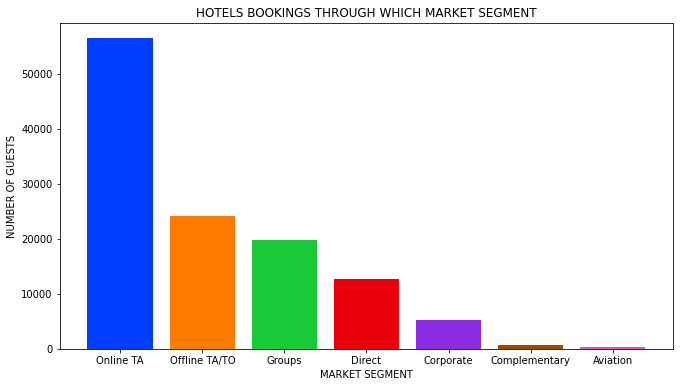

In [ ]:
# market segment wise hotel booking 
x = list(df.market_segment.value_counts().index.tolist()[0:-1])
y = list(df.market_segment.value_counts()[:-1])
plt.figure(figsize=(11,6))
plt.bar(x,y, color = sns.color_palette("bright"))
plt.xlabel("MARKET SEGMENT")
plt.ylabel("NUMBER OF GUESTS")
plt.title("HOTELS BOOKINGS THROUGH WHICH MARKET SEGMENT")
sns.color_palette("flare", as_cmap=True)
plt.show()

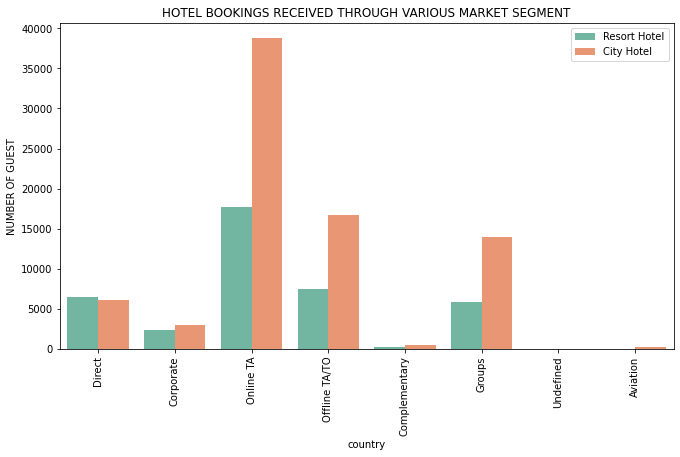

In [ ]:
#Hotel Bookings Received Through Various Market Segment
plt.figure(figsize = (11,6))
sns.countplot("market_segment", hue = "hotel", data = df, palette="Set2")
plt.xticks(rotation = "vertical")
plt.legend(loc="upper right")
plt.xlabel("country")
plt.title("HOTEL BOOKINGS RECEIVED THROUGH VARIOUS MARKET SEGMENT")
plt.ylabel("NUMBER OF GUEST")
plt.show()

**<font color=Darkblue >--> In Both Hotel, Resort Hotel Or City Hotel. Most Of Guests Do Booking From Online TA( Travel Agent )**

**<font color=Darkblue >--> More Than 45% Of Guest Booked From Online TA( Travel Agent )** 


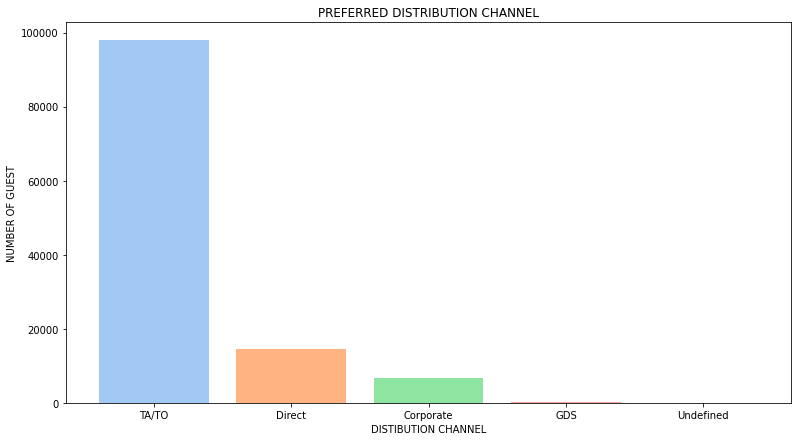

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [ ]:
# distribution channel
y = list(df["distribution_channel"].value_counts())
x = list(df["distribution_channel"].value_counts().index.tolist())
plt.figure(figsize= (13,7))
plt.bar(x, y, color = sns.color_palette ("pastel"))
plt.ylabel("NUMBER OF GUEST")
plt.xlabel("DISTIBUTION CHANNEL")
plt.title("PREFERRED DISTRIBUTION CHANNEL")
plt.show()
df["distribution_channel"].value_counts('')

**<font color=Red> MOST OF CHANNEL DISTRIBUTION IS IN TA/TO, WHICH IS MORE THAN 80%**


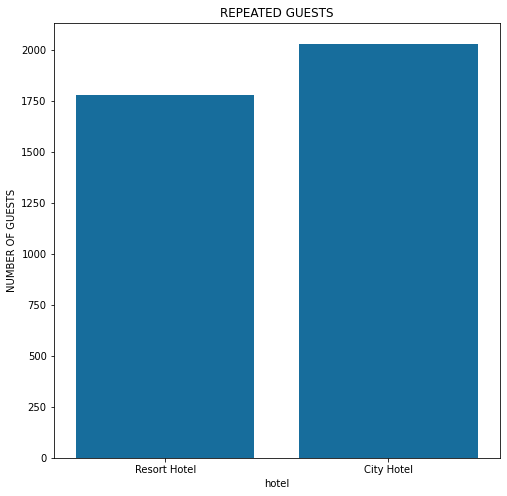

In [ ]:
# WHICH HOTEL HAVE MORE REPEATED GUEST
sns.countplot(df[df.is_repeated_guest == 1]["hotel"], hue= df[df.is_repeated_guest == 1]["is_repeated_guest"], data=df, palette= "colorblind")
plt.ylabel("NUMBER OF GUESTS")
plt.title("REPEATED GUESTS")
plt.gca().get_legend().remove()
plt.show()

###<font color = green >** CITY HOTEL HAVE MORE REPEATED GUEST THAN RESORT HOTEL**

###<font color = green >** BUT RATIO OF REPEATED GUEST IS MORE IN RESORT HOTEL THAN CITY HOTEL, BECAUSE CITY HOTEL HAVE EVERY HIGH NUMBER OF GUEST THAN RESORT HOTEL**

##<font color = red > What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?


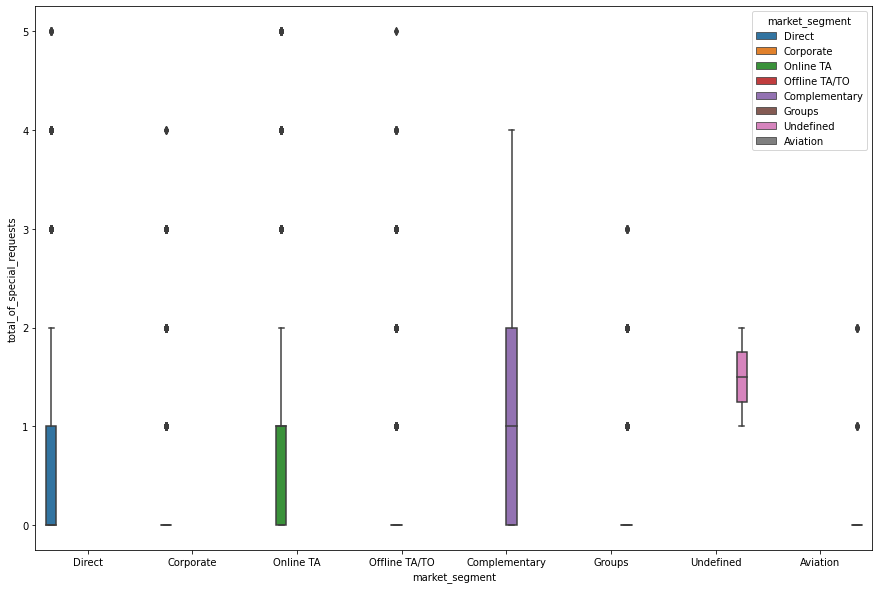

In [ ]:
#Special request acoording to market segment
sns.boxplot(x="market_segment", y="total_of_special_requests",hue='market_segment',data= df)
fig = plt.gcf()
fig.set_size_inches(15,10)

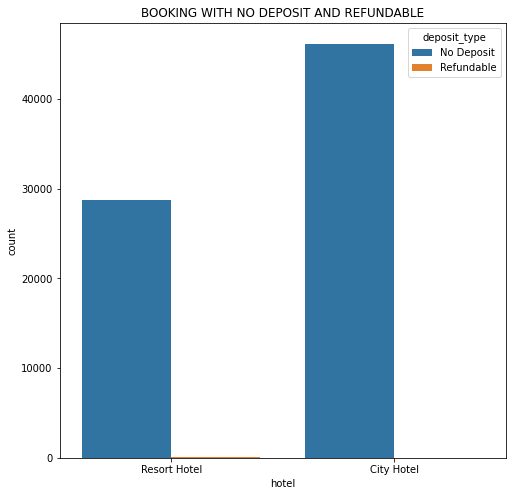

value_counts
hotel        deposit_type              
City Hotel   No Deposit           46198
             Refundable               6
Resort Hotel No Deposit           28749
             Refundable             120

In [ ]:
# NO DEPOSIT AND REFUNDABLE COULD BE A LOSS!
df2 = df[df.is_canceled == 0]
a = df2[df2["deposit_type"] != "Non Refund"]
sns.countplot("hotel", hue = "deposit_type", data = a)
plt.title("BOOKING WITH NO DEPOSIT AND REFUNDABLE")
plt.show()
a.groupby(["hotel"])["deposit_type"].agg(["value_counts"])

**<font color = Green > NON DEPOSIT BOOKING IS A LOT MORE THAN REFUNDABLE BOOKING**


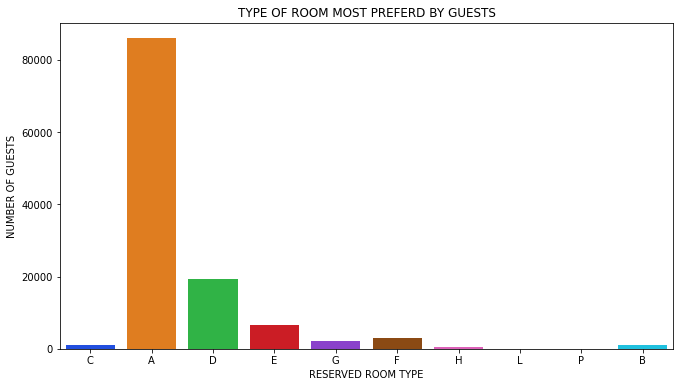

In [ ]:
# TYPE OF ROOM MOST PREFERD BY GUESTS
plt.figure(figsize = (11,6))
sns.countplot("reserved_room_type", data= df, palette= "bright")
plt.xlabel("RESERVED ROOM TYPE")
plt.ylabel("NUMBER OF GUESTS")
plt.title("TYPE OF ROOM MOST PREFERD BY GUESTS")
plt.show()

**<font color = Blue > MOST OF GUEST RESERVED A TYPE OF ROOM**

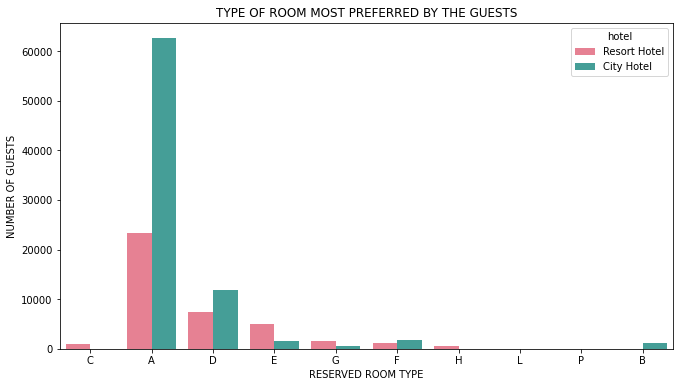

In [ ]:
# IN BOTH TYPE OF HOTEL TYPE OF ROOM MOST PREFERD BY GUESTS 
plt.figure(figsize = (11,6))
sns.countplot("reserved_room_type",hue = "hotel", data= df, palette= "husl")
plt.xlabel("RESERVED ROOM TYPE")
plt.ylabel("NUMBER OF GUESTS")
plt.title("TYPE OF ROOM MOST PREFERRED BY THE GUESTS")
plt.show()

##<font color = Green> IN BOTH TYPE OF HOTEL, A IS THE ROOM WHICH GET MORE RESERVED THAN ANY OTHER ROOMS

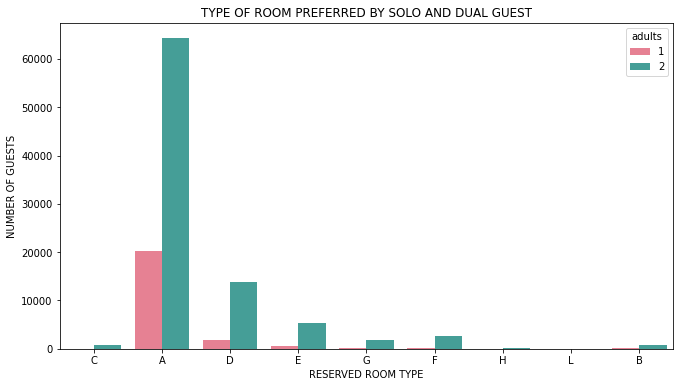

In [ ]:
# TYPE OF ROOM MOST PREFERRED BY SOLO AND DUAL GUESTS

a = df[(df.adults == 1) | (df.adults == 2)]
plt.figure(figsize = (11,6))
sns.countplot("reserved_room_type",hue = "adults", data= a, palette= "husl")
plt.xlabel("RESERVED ROOM TYPE")
plt.ylabel("NUMBER OF GUESTS")
plt.title("TYPE OF ROOM PREFERRED BY SOLO AND DUAL GUEST")
plt.show()

In [ ]:
#HOW MANY GUESTS CHANGE THEIR BOOKINGS?
df.groupby(["hotel"])["booking_changes"].agg(["value_counts"])

value_counts
hotel        booking_changes              
City Hotel   0                       69062
             1                        7232
             2                        2244
             3                         467
             4                         194
             5                          46
             6                          31
             7                          19
             8                           9
             14                          5
             9                           4
             10                          3
             13                          3
             15                          3
             11                          2
             12                          1
             16                          1
             17                          1
             18                          1
             20                          1
             21                          1
Resort Hotel 0                       32252
             1                        5469
             2                        1561
             3                         460
             4                         182
             5                          72
             6                          32
             7                          12
             8                           8
             9                           4
             10                          3
             13                          2
             12                          1
             16                          1
             17                          1

##**<font color= Red> MOST OF DEPOSIT WAS NON-REFUNDABLE**

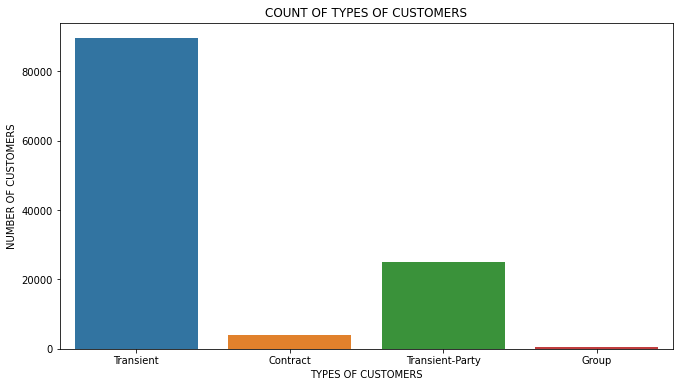

Transient          0.750591
Transient-Party    0.210436
Contract           0.034140
Group              0.004833
Name: customer_type, dtype: float64

In [ ]:
# COUNT OF TYPES OF CUSTOMERS
plt.figure(figsize = (11, 6))
sns.countplot(df["customer_type"])
plt.xlabel("TYPES OF CUSTOMERS")
plt.ylabel("NUMBER OF CUSTOMERS")
plt.title("COUNT OF TYPES OF CUSTOMERS")
plt.show()

df["customer_type"].value_counts(']')


##**<font color = Red > 75% TYPE OF GUEST WAS TRANSIENT**

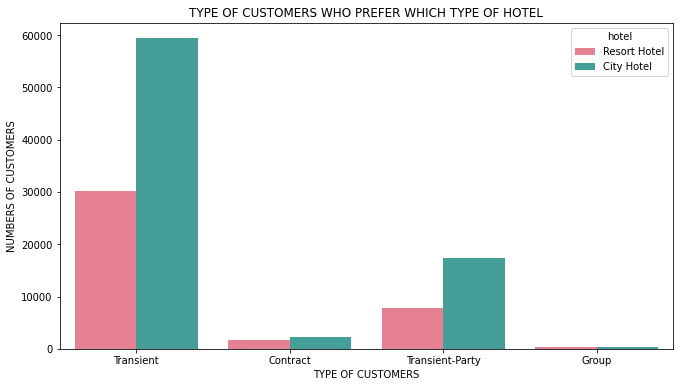

In [ ]:
# TYPE OF CUSTOMERS WHO PERFER WHICH TYPE OF HOTEL
plt.figure(figsize = (11, 6))
sns.countplot(df["customer_type"], hue = df["hotel"], palette= "husl")
plt.xlabel("TYPE OF CUSTOMERS")
plt.ylabel("NUMBERS OF CUSTOMERS")
plt.title("TYPE OF CUSTOMERS WHO PREFER WHICH TYPE OF HOTEL")
plt.show()

In [ ]:
# REQUIRED CAR PARKING SPACES TABLE
df['required_car_parking_spaces'].value_counts()
df.groupby(["hotel"])["required_car_parking_spaces"].agg(["value_counts"])

value_counts
hotel        required_car_parking_spaces              
City Hotel   0                                   77404
             1                                    1921
             2                                       3
             3                                       2
Resort Hotel 0                                   34570
             1                                    5462
             2                                      25
             8                                       2
             3                                       1

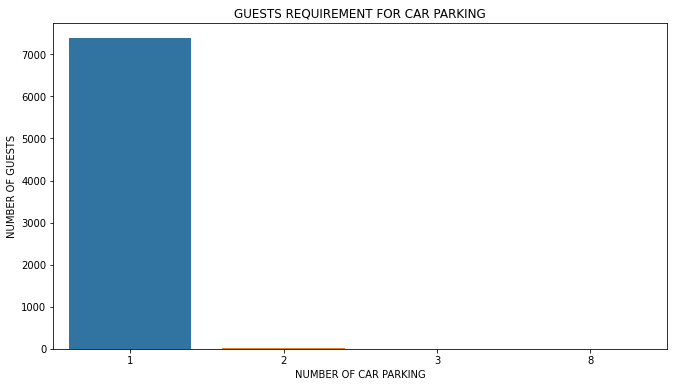

In [ ]:
# GUESTS REQUIREMENT FOR CAR PARKING

plt.figure(figsize = (11,6))
sns.countplot(df[df['required_car_parking_spaces'] > 0 ]['required_car_parking_spaces'], data = df)
plt.xlabel("NUMBER OF CAR PARKING")
plt.ylabel("NUMBER OF GUESTS")
plt.title("GUESTS REQUIREMENT FOR CAR PARKING")
plt.show()

**<font color = Green > NUMBER OF CAR PARKING REQUIRD 1, 2, 3 AND 8. BUT 1 CAR PARKING IS REQUIRD FROM THE MORE NUMBER OF GUEST**

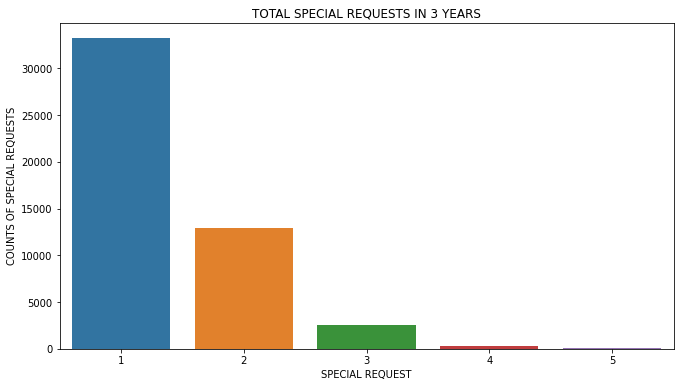

In [ ]:
# TOTAL SPECIAL REQUESTS IN 3 YEARS
plt.figure(figsize = (11,6))
sns.countplot(df[df['total_of_special_requests'] > 0 ]['total_of_special_requests'], data = df)
plt.xlabel("SPECIAL REQUEST")
plt.ylabel("COUNTS OF SPECIAL REQUESTS")
plt.title("TOTAL SPECIAL REQUESTS IN 3 YEARS")
plt.show()

**<font color = Red > SO 1 NUMBER OF SPECIAL REQUEST IS THE HIGHEST**

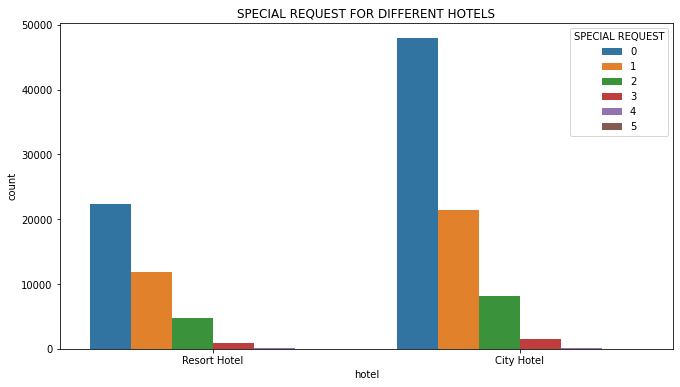

In [ ]:
# SPECIAL REQUEST FOR DIFFERENT HOTELS

a = df.copy()
a["SPECIAL REQUEST"] = a["total_of_special_requests"]

plt.figure(figsize = (11,6))
sns.countplot("hotel", hue = "SPECIAL REQUEST", data = a)
plt.title("SPECIAL REQUEST FOR DIFFERENT HOTELS")
plt.show()

**<font color = red > 0 MEANS NO SPECIAL REQUEST! SO BOTH HOTEL HAVE 1 NUMBER OF SPECIAL MORE THAN OTHER NUMBER OF SPECIAL REQUEST** 

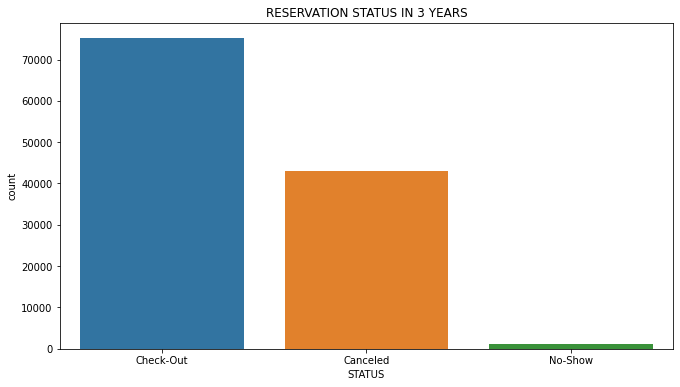

In [ ]:
# RESERVATION STATUS
plt.figure(figsize = (11,6))
sns.countplot("reservation_status", data = df)
plt.xlabel("STATUS")
plt.title("RESERVATION STATUS IN 3 YEARS")
plt.show()

<font color = red >**  CONCLUSION:** </font>
<font color = Green >
1. Type A room is in most demand.
2. Most bookings were made from online travel agents.
3. Most customers are from Portugal.
4. Most customers prefer the Bed and breakfast meal type.
5. City hotels are more engaging and in demand. Hence, city hotels are more profitable.
6. City hotels receives a higher number of guests than the resort hotels. However, the cancellation rate is more for city hotels.
7. City hotels have a higher number of repeat customers. However, the ratio of repeat customers is more for resort hotels as the city hotels receives a higher number of guests than the resort hotels.
8. Non-refundable deposits tend to convert to a successful transaction.
9. May is the busier and most profitable month for the hotels in 2017. 
10. On an average, May-June is the busier and most profitable month for the hotels.
11. City hotels have received the most special requests.
12. 1 number of requests is the highest.
13. 1 car parking was needed for most of the guests.

#<font color = Blue > Strategies to Counter High Cancellations at the Hotel </font>


<font color= red >

1.  Set Non-refundable Rates, Collect deposits, and implement more rigid cancellation policies.
2.Encourage Direct bookings by offering special discounts
3.Monitor where the cancellations are coming from such as Market Segment, distribution channels, etc.
